---
description: We define all the usefull functions to predict the score from a given
  sequence
output-file: predictions.html
title: predictions

---

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp predictions

In [ ]:
#| export
import pickle
import sklearn
import numpy as np
import pandas as pd
from dgrec.example_data import get_example_data_dir
import RNA
import os
import matplotlib.pyplot as plt
from dgrec import encoding

In [ ]:
# | export

data_path=get_example_data_dir()
model_name='e_TRSp_classifier.pkl'
model_path=os.path.join(data_path,model_name)
model_Sp=pickle.load(open(model_path,"rb"))

model_name2='e_TRSpAvd_classifier.pkl'
model_path2=os.path.join(data_path,model_name2)
model_Avd_Sp=pickle.load(open(model_path2,"rb"))

model_name_whole='whole_model.pkl'
model_path_whole=os.path.join(data_path,model_name_whole)
model_whole=pickle.load(open(model_path_whole,"rb"))

In [ ]:
# | export

def score(TR_seq:str #A string of the TR DNA sequence
,features=1 #The classifier model, no need to specify it (one feature by default). If two: uses the two features model
         ):

    """Calculates the predicted score of a given TR sequence (1 = perfect TR and 0 = crappy TR).  If features=2, returns the score according to each feature (better to have both high)."""
    encoded_TR=encoding.encode_tr_list([TR_seq],features)
    if features == 1:
        score=np.round(model_Sp.predict_proba([encoded_TR[0]])[:,1],decimals=2).item()
    elif features==2:
        score=[np.round(model_Sp.predict_proba([encoded_TR[0][:1]])[:,1],decimals=2).item(),np.round(model_Avd_Sp.predict_proba([encoded_TR[0][1:2]])[:,1],decimals=2).item()]
    return score

In [ ]:
TR_bad='TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGG'
print('TR bad score =',score(TR_bad))
TR_good='AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAAATACTTTTTCTACTCAAACATTAT'
print('TR good score =',score(TR_good))

TR bad score = 0.23
TR good score = 0.84


In [ ]:
# | export
def score_list(TR_seq_list:list, #A list of strings of TRs DNA sequences
TR_name_list:list, #A list of strings of TRs names
features=1 #The number of features to use
              ):
    """Calculates the score for every TR in the list and returns them in a dataframe format. If features=2, returns the score according to each feature (better to have both high)."""

    encoded_TR=encoding.encode_tr_list(TR_seq_list,features)
    if features==1:
        score=np.round(model_Sp.predict_proba(encoded_TR)[:,1],decimals=2)
        score_df=pd.DataFrame({
            'TR_Name':TR_name_list,
            'TR_Seq':TR_seq_list,
            'TR_Score':score
        })
        return score_df
    else:
        score_Sp=np.round(model_Sp.predict_proba(encoded_TR[:,:1])[:,1],decimals=2)
        score_Avd_Sp=np.round(model_Avd_Sp.predict_proba(encoded_TR[:,1:2])[:,1],decimals=2)
        score_df=pd.DataFrame({
            'TR_Name':TR_name_list,
            'TR_Seq':TR_seq_list,
            'TR_Score_Sp':score_Sp,
            'TR_Score_Avd':score_Avd_Sp
        })
        return score_df

In [ ]:
TR_bad=[
     'TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGG',
     'AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGGACAAAGGTCGTGATTTCGCTA',
    'GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGCTGATCGCGCGTAAGAAGGACTGGG',
     'CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCG',
     'ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAAGGATCTGATTATCAAGCTGCCGAA',
     'AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGG',
     'CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTTCTAAGCGCGTGATTCTGGCGG',
     'ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAAGCCGATCCGTGAGCAGGCGGA',   
 ]

score_list(TR_bad,['TR_bad_'+str(k) for k in range (1,9)])

,TR_Name,TR_Seq,TR_Score
0,TR_bad_1,TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACG...,0.23
1,TR_bad_2,AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGT...,0.05
2,TR_bad_3,GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGC...,0.00
3,TR_bad_4,CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGT...,0.00
4,TR_bad_5,ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAA...,0.01
5,TR_bad_6,AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGC...,0.08
6,TR_bad_7,CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGT...,0.06
7,TR_bad_8,ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGA...,0.12


In [ ]:
TR_good=[
     'AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAAATACTTTTTCTACTCAAACATTAT',
     'TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATGGCGAAATTCGTAAACGCCCTCTGA',
     'ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCGGTTTCTCTAAGGAGTCCATTCTGC',
     'GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTACTCTGTTCTGGTGGTCGCCAAGGTC',
     'AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAA',
     'GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTCCTGTACCTGGCCTCGCACTACGAG',
     'CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTT',
     'CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAA'
     ]

score_list(TR_good,['TR_good_'+str(k) for k in range (1,9)])

,TR_Name,TR_Seq,TR_Score
0,TR_good_1,AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAA...,0.84
1,TR_good_2,TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATG...,0.82
2,TR_good_3,ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCG...,0.76
3,TR_good_4,GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTAC...,0.74
4,TR_good_5,AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTT...,0.83
5,TR_good_6,GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTC...,0.55
6,TR_good_7,CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGA...,0.81
7,TR_good_8,CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTC...,0.81


In [ ]:
TR_bad=[
     'TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGG',
     'AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGGACAAAGGTCGTGATTTCGCTA',
    'GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGCTGATCGCGCGTAAGAAGGACTGGG',
     'CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCG',
     'ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAAGGATCTGATTATCAAGCTGCCGAA',
     'AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGG',
     'CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTTCTAAGCGCGTGATTCTGGCGG',
     'ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAAGCCGATCCGTGAGCAGGCGGA',   
 ]

score_list(TR_bad,['TR_bad_'+str(k) for k in range (1,9)],2)

,TR_Name,TR_Seq,TR_Score_Sp,TR_Score_Avd
0,TR_bad_1,TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACG...,0.23,0.63
1,TR_bad_2,AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGT...,0.05,0.42
2,TR_bad_3,GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGC...,0.00,0.30
3,TR_bad_4,CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGT...,0.00,0.51
4,TR_bad_5,ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAA...,0.01,0.59
5,TR_bad_6,AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGC...,0.08,0.54
6,TR_bad_7,CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGT...,0.06,0.29
7,TR_bad_8,ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGA...,0.12,0.04


In [ ]:
TR_good=[
     'AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAAATACTTTTTCTACTCAAACATTAT',
     'TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATGGCGAAATTCGTAAACGCCCTCTGA',
     'ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCGGTTTCTCTAAGGAGTCCATTCTGC',
     'GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTACTCTGTTCTGGTGGTCGCCAAGGTC',
     'AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAA',
     'GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTCCTGTACCTGGCCTCGCACTACGAG',
     'CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTT',
     'CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAA'
     ]

score_list(TR_good,['TR_good_'+str(k) for k in range (1,9)],2)

,TR_Name,TR_Seq,TR_Score_Sp,TR_Score_Avd
0,TR_good_1,AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAA...,0.84,0.80
1,TR_good_2,TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATG...,0.82,0.78
2,TR_good_3,ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCG...,0.76,0.84
3,TR_good_4,GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTAC...,0.74,0.75
4,TR_good_5,AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTT...,0.83,0.88
5,TR_good_6,GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTC...,0.55,0.58
6,TR_good_7,CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGA...,0.81,0.34
7,TR_good_8,CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTC...,0.81,0.82


In [ ]:
# | export
def DGR_percentage(TR_seq:str #A string of the TR DNA sequence
         ):

    """Calculates the predicted DGR mutagenesis percentage of a given TR sequence (100 = perfect TR and 0 = crappy TR)"""
    encoded_TR=encoding.encode_tr_list([TR_seq],2)
    rate=model_whole.predict(encoded_TR)[0]
    return 10**rate

In [ ]:
# | export
def DGR_percentage_list(TR_seq_list:list, #A list of strings of TRs DNA sequences
TR_name_list:list, #A list of strings of TRs names
              ):
    """Calculates the predicted DGR mutagenesis percentage for every TR in the list and returns them in a dataframe format"""

    encoded_TR=encoding.encode_tr_list(TR_seq_list,2)
    rates=model_whole.predict(encoded_TR)
    score_df=pd.DataFrame({
        'TR_Name':TR_name_list,
        'TR_Seq':TR_seq_list,
        'TR_rates':10**rates
    })
    return score_df

In [ ]:
TR_bad=[
     'TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGG',
     'AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGTGGGACAAAGGTCGTGATTTCGCTA',
    'GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGCTGATCGCGCGTAAGAAGGACTGGG',
     'CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCG',
     'ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAAGGATCTGATTATCAAGCTGCCGAA',
     'AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGG',
     'CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTTCTAAGCGCGTGATTCTGGCGG',
     'ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAAGCCGATCCGTGAGCAGGCGGA',   
 ]

DGR_percentage_list(TR_bad,['TR_bad_'+str(k) for k in range (1,9)])

,TR_Name,TR_Seq,TR_rates
0,TR_bad_1,TTAGCGAATGGCGAAATTCGTAAACGCCCTCTGATCGAAACCAACG...,0.427049
1,TR_bad_2,AAACGCCCTCTGATCGAAACCAACGGCGAAACGGGTGAGATCGTGT...,0.110769
2,TR_bad_3,GGTTTCTCTAAGGAGTCCATTCTGCCGAAGCGCAACTCCGACAAGC...,0.019986
3,TR_bad_4,CAAGCTGATCGCGCGTAAGAAGGACTGGGATCCGAAGAAGTACGGT...,0.025612
4,TR_bad_5,ACCCGATTGACTTCCTCGAGGCGAAGGGGTACAAGGAGGTGAAGAA...,0.045752
5,TR_bad_6,AGTACTCCCTGTTCGAGCTGGAGAATGGTCGTAAGCGTATGCTGGC...,0.172833
6,TR_bad_7,CAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGT...,0.092111
7,TR_bad_8,ACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGA...,0.039965


In [ ]:
TR_good=[
     'AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAAATACTTTTTCTACTCAAACATTAT',
     'TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATGGCGAAATTCGTAAACGCCCTCTGA',
     'ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCGGTTTCTCTAAGGAGTCCATTCTGC',
     'GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTACTCTGTTCTGGTGGTCGCCAAGGTC',
     'AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAA',
     'GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTCCTGTACCTGGCCTCGCACTACGAG',
     'CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGATTATTGAGCAGATTTCTGAGTTTT',
     'CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTCTGCCTACAATAAGCACCGTGATAA'
     ]

DGR_percentage_list(TR_good,['TR_good_'+str(k) for k in range (1,9)])

,TR_Name,TR_Seq,TR_rates
0,TR_good_1,AAATGATCGCCAAATCTGAACAGGAAATTGGCAAAGCAACCGCTAA...,3.067841
1,TR_good_2,TCAAACATTATGAATTTCTTCAAAACCGAAATCACCTTAGCGAATG...,2.721600
2,TR_good_3,ATGCCTCAAGTAAACATCGTTAAAAAGACTGAGGTGCAGACTGGCG...,2.808427
3,TR_good_4,GGATCCGAAGAAGTACGGTGGCTTCGATTCTCCGACCGTGGCGTAC...,1.919474
4,TR_good_5,AGCGTATGCTGGCGTCTGCGGGTGAGCTGCAGAAGGGGAACGAGTT...,4.142115
5,TR_good_6,GCAGAAGGGGAACGAGTTGGCCCTTCCGTCCAAGTACGTGAACTTC...,0.811313
6,TR_good_7,CAGAAGCAGCTGTTCGTGGAGCAGCACAAGCACTACCTGGACGAGA...,0.940305
7,TR_good_8,CTAAGCGCGTGATTCTGGCGGACGCGAATCTGGATAAGGTCCTGTC...,3.040041


In [ ]:
# | export
# | hide

codon_usage_ecoli = {
    "F": {"TTT": 0.57, "TTC": 0.43},
    "L": {"TTA": 0.15, "TTG": 0.12, "CTT": 0.12, "CTC": 0.10, "CTA": 0.05, "CTG": 0.46},
    "S": {"TCT": 0.11, "TCC": 0.11, "TCA": 0.15, "TCG": 0.16, "AGT": 0.14, "AGC": 0.33},
    "Y": {"TAT": 0.53, "TAC": 0.47},
    "*": {"TAA": 0.64, "TAG": 0.00, "TGA": 0.36},
    "C": {"TGT": 0.42, "TGC": 0.58},
    "W": {"TGG": 1.00},
    "P": {"CCT": 0.17, "CCC": 0.13, "CCA": 0.14, "CCG": 0.55},
    "H": {"CAT": 0.55, "CAC": 0.45},
    "Q": {"CAA": 0.30, "CAG": 0.70},
    "R": {"CGT": 0.36, "CGC": 0.44, "CGA": 0.07, "CGG": 0.07, "AGA": 0.07, "AGG": 0.00},
    "I": {"ATT": 0.58, "ATC": 0.35, "ATA": 0.07},
    "M": {"ATG": 1.00},
    "T": {"ACT": 0.16, "ACC": 0.47, "ACA": 0.13, "ACG": 0.24},
    "N": {"AAT": 0.47, "AAC": 0.53},
    "K": {"AAA": 0.73, "AAG": 0.27},
    "V": {"GTT": 0.25, "GTC": 0.18, "GTA": 0.17, "GTG": 0.40},
    "A": {"GCT": 0.11, "GCC": 0.31, "GCA": 0.20, "GCG": 0.38},
    "D": {"GAT": 0.65, "GAC": 0.35},
    "E": {"GAA": 0.70, "GAG": 0.30},
    "G": {"GGT": 0.29, "GGC": 0.46, "GGA": 0.13, "GGG": 0.12}
}

# Genetic code: codon -> amino acid
genetic_code = {}
for aa, codons in codon_usage_ecoli.items():
    for codon in codons:
        genetic_code[codon] = aa

CODON_TO_AA = {
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
    'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
    'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
    'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W'
}


AA = '-ACDEFGHIKLMNPQRSTVWY'
AA_IDS = {k: i for i, k in enumerate(AA)}


AA_TO_CODONS = {
    'A': ['GCT', 'GCC', 'GCA', 'GCG'],  # Alanine
    'C': ['TGT', 'TGC'],               # Cysteine
    'D': ['GAT', 'GAC'],               # Aspartic acid
    'E': ['GAA', 'GAG'],               # Glutamic acid
    'F': ['TTT', 'TTC'],               # Phenylalanine
    'G': ['GGT', 'GGC', 'GGA', 'GGG'], # Glycine
    'H': ['CAT', 'CAC'],               # Histidine
    'I': ['ATT', 'ATC', 'ATA'],        # Isoleucine
    'K': ['AAA', 'AAG'],               # Lysine
    'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],  # Leucine
    'M': ['ATG'],                      # Methionine (Start codon)
    'N': ['AAT', 'AAC'],               # Asparagine
    'P': ['CCT', 'CCC', 'CCA', 'CCG'], # Proline
    'Q': ['CAA', 'CAG'],               # Glutamine
    'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],  # Arginine
    'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],  # Serine
    'T': ['ACT', 'ACC', 'ACA', 'ACG'], # Threonine
    'V': ['GTT', 'GTC', 'GTA', 'GTG'], # Valine
    'W': ['TGG'],                      # Tryptophan
    'Y': ['TAT', 'TAC'],               # Tyrosine
    '*': ['TAA', 'TAG', 'TGA'],        # Stop codons
    '-': []                            # Gap (no codons)
}

def nt_to_codons(nt_sequence:str #A string corresponding to a nucleotide sequence
                ):
    """
    Converts a nucleotide sequence into a list of codons.
    
    Args:
        nt_sequence (str): A string of nucleotides (e.g., "ATGGCATGA").
        
    Returns:
        list: A list of codons (e.g., ['ATG', 'GCA', 'TGA']).
    """
    # Ensure the sequence length is a multiple of 3 by trimming extra nucleotides
    trimmed_sequence = nt_sequence[:len(nt_sequence) // 3 * 3]
    
    # Split the sequence into codons (groups of 3 nucleotides)
    codons = [trimmed_sequence[i:i+3] for i in range(0, len(trimmed_sequence), 3)]
    
    return codons

def codons_to_aa(codons:str #A list of strings corresponding to codons
                ):
    """
    Converts a list of codons into a sequence of amino acids.
    
    Args:
        codons (list): A list of codon strings (e.g., ['ATG', 'GCA', 'TGA']).
        
    Returns:
        str: The translated amino acid sequence (e.g., 'M*A').
    """
    aa_sequence = ""
    for codon in codons:
        # Convert codon to amino acid; default to 'X' for invalid codons
        aa_sequence += CODON_TO_AA.get(codon, 'X')
    return aa_sequence

def nt_prot(nt #A nucleotide sequence
           ):
    """
    Converts a nucleotide into a sequence of amino acids.
    
    Args:
        nt (str): A nucleotide sequence (DNA) string.
        
    Returns:
        str: The translated amino acid sequence (e.g., 'M*A').
    """
    return codons_to_aa(nt_to_codons(nt))

def pareto_front(sequences #Dataframe containing a sequence and its two scores
                ):
    """
    Keep only Pareto-optimal sequences:
    no other sequence has both scores >= and at least one strictly greater.
    Args:
        sequences (DataFrame): A dataframe of sequences and their two scores.
        
    Returns:
        pareto: the list of rows corresponding to pareto optima (no sequence with both scores higher).
    """
    pareto = []
    for s in sequences:
        dominated = False
        for t in sequences:
            if (t["Score_TRSp"] >= s["Score_TRSp"] and
                t["Score_TRSpAvd"] >= s["Score_TRSpAvd"] and
                (t["Score_TRSp"] > s["Score_TRSp"] or
                 t["Score_TRSpAvd"] > s["Score_TRSpAvd"])):
                dominated = True
                break
        if not dominated:
            pareto.append(s)
    return pareto

def propose_single_codon_changes(seq, frame_offset=0,freq_min=0.2,forbidden_positions=[],codon_usage=codon_usage_ecoli):
    """
    Generate all single-codon synonymous changes from a given sequence.
    Takes into account reading frame offset (Position % 3).
    Returns list of (new_seq, new_changes).
    """
    variants = []
    for i in range(frame_offset, len(seq)-2, 3):
      if not( (i in forbidden_positions) or (i+1 in forbidden_positions) or (i+2 in forbidden_positions)): 
        codon = seq[i:i+3]
        aa = genetic_code.get(codon, "?")
        if aa not in codon_usage:
            continue

        ranked = sorted(codon_usage[aa].items(), key=lambda x: x[1], reverse=True)
        for new_codon, usage in ranked:
            if new_codon == codon or usage<freq_min:
                continue
            new_seq = seq[:i] + new_codon + seq[i+3:]
            
            variants.append(new_seq)
    return variants

def evaluate_sequences(variants):
    """
    Encode sequences, run classifiers, return list of dicts with scores.
    """
    seqs = [v for v in variants]
    Scores=score_list(seqs, #A list of strings of TRs DNA sequences
seqs, #A list of strings of TRs names
features=2)
    Score_TRSp = list(Scores['TR_Score_Sp'])
    Score_TRSpAvd = list(Scores['TR_Score_Avd'])
    plt.figure(figsize=(6,6))
    plt.scatter(Score_TRSp, Score_TRSpAvd, alpha=0.7)
    plt.xlabel("Score_TRSp")
    plt.ylabel("Score_TRSpAvd")
    plt.grid(True)
    plt.show()
    results = []
    for i, seq,  in enumerate(variants):
        results.append({
            "sequence": seq,
            "Score_TRSp": Score_TRSp[i],
            "Score_TRSpAvd": Score_TRSpAvd[i],
            "Score_geo_mean": np.sqrt(Score_TRSp[i] * Score_TRSpAvd[i])
        })
    return results

In [ ]:
#| export
def optimize_sequence(
    original_seq: str,
    frame_offset: int = 0,
    CHANGES: int = 6,
    freq_min: float = 0.2,
    N: int = 1,
    forbidden_positions: list[int] = [],
    threshold: float = 0.7,
    codon_usage: dict = codon_usage_ecoli
):
    """
    Optimize a DNA sequence via synonymous codon substitutions.

    This function performs a beam-search–based optimization of a nucleotide
    sequence by iteratively proposing single-codon synonymous changes and
    evaluating them with the two scoring functions. The search stops early if a
    variant meets the specified score thresholds, otherwise the best Pareto-
    optimal solution is returned.

    Parameters
    ----------
    original_seq : str
        Original DNA sequence to optimize.
    frame_offset : int, default=0
        Reading-frame offset (0, 1, or 2) used when grouping codons.
    CHANGES : int, default=6
        Maximum number of codon substitutions allowed.
    freq_min : float, default=0.2
        Lowest usage frequency acceptable.
    N : int, default=1
        Number of putative TR to output.
    forbidden_positions : list[int], optional
        Nucleotide positions that must not be modified.
    threshold : float, default=0.7
        Minimum required value for both `Score_TRSp` and `Score_TRSpAvd` to
        accept a sequence as optimal.
    codon_usage : dict, optional
        Codon usage table of E. Coli mapping amino acids to codons and frequencies.

    Returns
    -------
    dict
        Dictionary containing:
        - `Original_Sequence` : str  
          Input DNA sequence.
        - `New_Variant` : str  
          Optimized DNA sequence.
        - `Rank` : int or None  
          rank of the sequence (by score).
        - `Score` : float or None  
          score of the selected variant (geometrical mean).
        - `Score_TRSp` : float or None  
          TR+Sp score of the selected variant.
        - `Score_TRSpAvd` : float or None  
          Avd+TR+Sp score of the selected variant.

    Notes
    -----
    - The algorithm keeps only Pareto-optimal candidates at each iteration.
    - If no variant satisfies the threshold criteria, the best-scoring
      sequence after `CHANGES` iterations is returned.
    - Internal scoring and plotting are handled by `evaluate_sequences`.

    Examples
    --------
    ```python
    result = optimize_sequence("ATGGCTGCTTAA")
    result["New_Variant"]
    ```
    """
    beam = [original_seq]
    evaluated = evaluate_sequences(beam)

    good = [
        v for v in evaluated
        if v["Score_TRSp"] >= threshold and v["Score_TRSpAvd"] >= threshold
    ]
    if good and N==1:
        best = max(good, key=lambda x: x["Score_geo_mean"])
        return [{
            "Original_Sequence": original_seq,
            "New_Variant": best["sequence"],
            "Score": best['Score_geo_mean'],
            "Rank":1,
            "Score_TRSp": best["Score_TRSp"],
            "Score_TRSpAvd": best["Score_TRSpAvd"]
        }]

    codon_changes_done = 0
    while beam and codon_changes_done <= CHANGES:
        codon_changes_done += 1
        variants = []
        for seq in beam:
            variants.extend(
                propose_single_codon_changes(
                    seq, frame_offset, freq_min,
                    forbidden_positions, codon_usage
                )
            )

        variants = np.unique(variants)
        evaluated = evaluate_sequences(variants)
        good = [
            v for v in evaluated
            if v["Score_TRSp"] >= threshold and v["Score_TRSpAvd"] >= threshold
        ]
        if good:
            good.sort(key=lambda x: x["Score_geo_mean"], reverse=True)
            selected = good[:N]
        
            # 2) if fewer than N, fill with best overall
            if len(selected) < N:
                remaining = [
                    v for v in evaluated
                    if v["sequence"] not in {s["sequence"] for s in selected}
                ]
                remaining.sort(key=lambda x: x["Score_geo_mean"], reverse=True)
                selected.extend(remaining[: N - len(selected)])
        
            # 3) format output
            return [
                {
                    "Original_Sequence": original_seq,
                    "New_Variant": v["sequence"],
                    "Score": v["Score_geo_mean"],
                    "Rank": i+1,
                    "Score_TRSp": v["Score_TRSp"],
                    "Score_TRSpAvd": v["Score_TRSpAvd"],
                }
                for i,v in enumerate(selected)
            ]
        evaluated.sort(key=lambda x: x["Score_geo_mean"], reverse=True)
        # Keep only Pareto-optimal variants
        pareto_variants = pareto_front(evaluated)

        # Optional: still restrict beam size if too many
        pareto_variants.sort(key=lambda x: x["Score_geo_mean"], reverse=True)
        beam = [v["sequence"] for v in pareto_variants[:40]]
    selected=[]
    evaluated.sort(key=lambda x: x["Score_geo_mean"], reverse=True)

    remaining = [
                    v for v in evaluated
                    if v["sequence"] not in {s["sequence"] for s in selected}
                ]
    remaining.sort(key=lambda x: x["Score_geo_mean"], reverse=True)
    selected.extend(remaining[: N - len(selected)])
        
            # 3) format output
    return [
        {
            "Original_Sequence": original_seq,
            "New_Variant": v["sequence"],
            "Score": v["Score_geo_mean"],
            "Rank": i+1,
            "Score_TRSp": v["Score_TRSp"],
            "Score_TRSpAvd": v["Score_TRSpAvd"],
        }
        for i,v in enumerate(selected)
    ]


CCTGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA


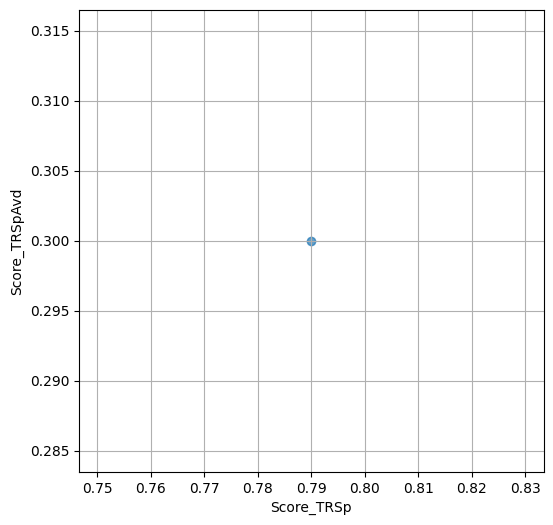

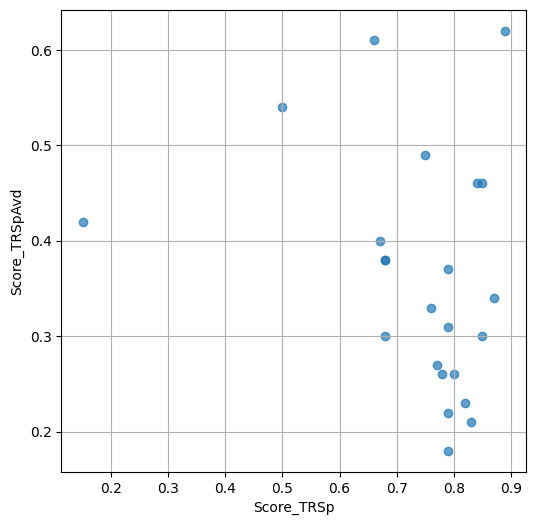

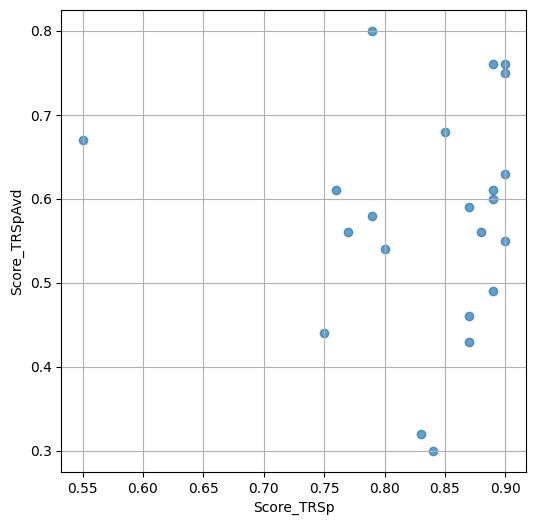

[{'Original_Sequence': 'CCTGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'New_Variant': 'CCGGTATGTTTCCTGTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'Score': 0.8270429251254133,
  'Rank': 1,
  'Score_TRSp': 0.9,
  'Score_TRSpAvd': 0.76},
 {'Original_Sequence': 'CCTGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'New_Variant': 'CCGGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAACTGCTGCTGATAAATAAAA',
  'Score': 0.8224354077980836,
  'Rank': 2,
  'Score_TRSp': 0.89,
  'Score_TRSpAvd': 0.76},
 {'Original_Sequence': 'CCTGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'New_Variant': 'CCGGTATGTTTCCTTTCCCCAGAGAACTTGACGAGCTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'Score': 0.8215838362577492,
  'Rank': 3,
  'Score_TRSp': 0.9,
  'Score_TRSpAvd': 0.75},
 {'Original_Sequence': 'CCTGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTTTATAGGTAATTACTGCTGATAAATAAAA',
  'New_Variant': 'CCGGTATGTTTCCTTTCCCCAGAGAACTTGACGAGTTGGGTGTATAG

In [ ]:
seq = ''.join(np.random.choice(['A','T','C','G'], size=70))
print(seq)

optimize_sequence(seq,N=5,CHANGES=6)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()